In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Amir Hassan/Desktop/Python/train.csv', skipinitialspace=True)

In [3]:
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.281,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.360,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.262,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.117,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.299,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy


In [4]:
df['log_transformed_popularity'] = np.log(df['popularity' ]+ 1)

In [5]:
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre,log_transformed_popularity
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance,3.850148
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian,0.000000
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal,1.386294
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass,3.178054
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy,3.258097


In [6]:
# missing values
df["popularity_confidence"] = df["popularity_confidence"].fillna(df["popularity_confidence"].mode()[0])
df['key'] = df.groupby(['artists', 'album_name'])['key'].transform(lambda x: x.fillna(x.median()))

# remove useless variables
column2drop = [ "name", "popularity_confidence","features_duration_ms","n_beats","processing","n_bars", "artists", "album_name"]
df.drop(column2drop, axis=1, inplace=True)

In [7]:
df.head()

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,log_transformed_popularity
0,241760,False,46,0.690,0.513,5,-12.529,1.0,0.0975,0.302000,0.53600,0.281,0.6350,142.221,4.0,j-dance,3.850148
1,444000,False,0,0.069,0.196,1,-24.801,0.0,0.0805,0.283000,0.93400,0.360,0.0336,75.596,4.0,iranian,0.000000
2,333506,False,3,0.363,0.854,2,-7.445,NaN,0.0397,0.000089,0.80000,0.262,0.4890,116.628,4.0,black-metal,1.386294
3,269800,False,23,0.523,0.585,5,-5.607,1.0,0.0765,0.066400,0.00127,0.117,0.3850,140.880,4.0,bluegrass,3.178054
4,307651,False,25,0.643,0.687,7,-11.340,1.0,0.0539,0.000576,0.09690,0.299,0.6370,143.956,4.0,happy,3.258097


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=100)

In [10]:
# Simple Regression Start from here

In [11]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [19]:
x_train = df_train["speechiness"].values.reshape(-1, 1)
y_train = df_train["instrumentalness"].values

x_test = df_test["speechiness"].values.reshape(-1, 1)
y_test = df_test["instrumentalness"].values

In [20]:
## Linear Regression

In [21]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [22]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-0.49722704]
Intercept: 
 0.32802483502845664


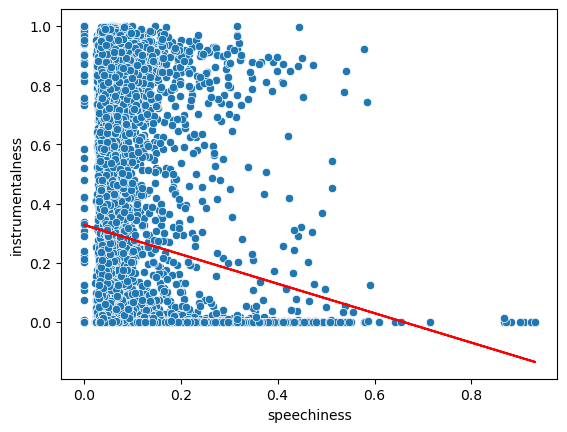

In [23]:
sns.scatterplot(data=df_train, x="speechiness", y="instrumentalness")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

In [24]:
y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.015
MSE: 0.144
MAE: 0.344


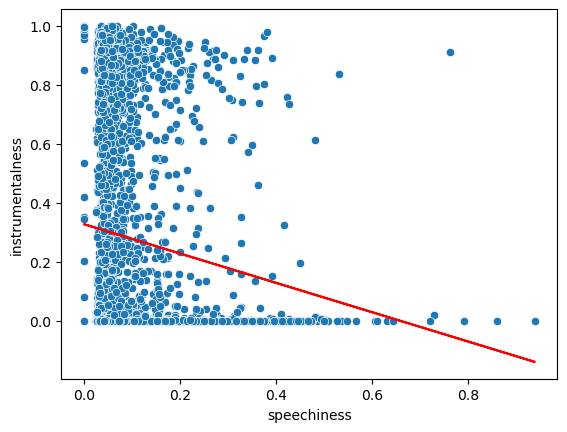

In [25]:
sns.scatterplot(data=df_test,  x="speechiness", y="instrumentalness")
plt.plot(x_test, reg.coef_[0]*x_test+reg.intercept_, c="red")

In [26]:
### Ridge

In [27]:
reg = Ridge()
reg.fit(x_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-0.49095567]
Intercept: 
 0.32750217173398316


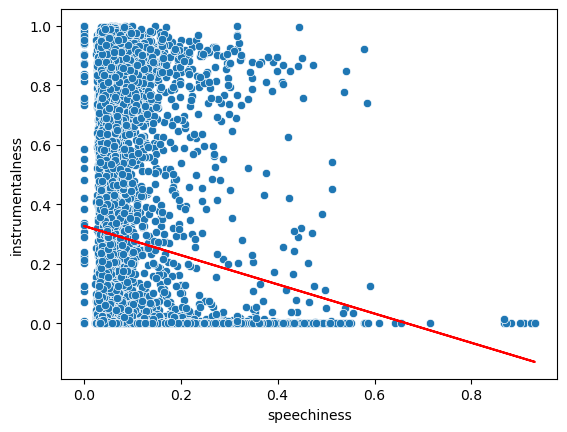

In [28]:
sns.scatterplot(data=df_train, x="speechiness", y="instrumentalness")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

In [29]:
y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.015
MSE: 0.144
MAE: 0.344


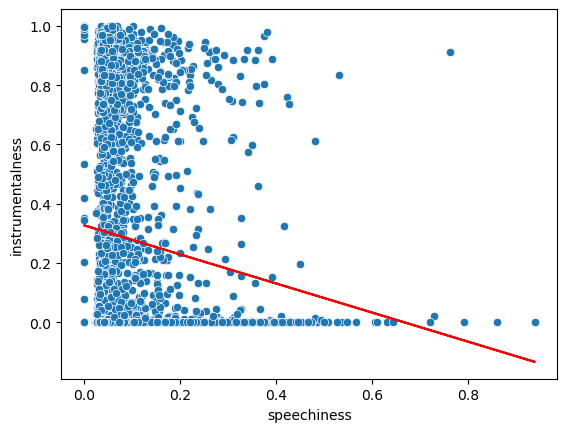

In [30]:
sns.scatterplot(data=df_test,  x="speechiness", y="instrumentalness")
plt.plot(x_test, reg.coef_[0]*x_test+reg.intercept_, c="red")

In [31]:
### LASO

In [32]:
reg = Lasso()
reg.fit(x_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-0.]
Intercept: 
 0.2865853229714286


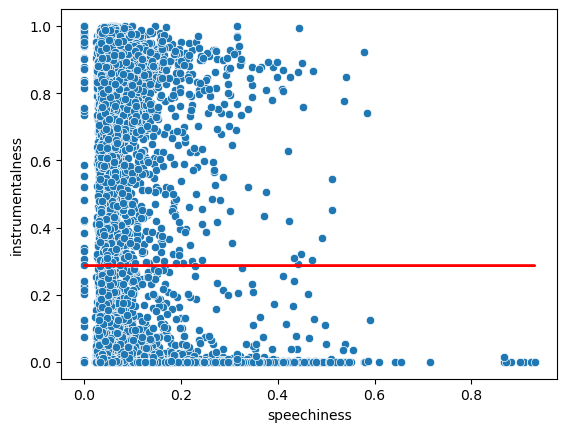

In [33]:
sns.scatterplot(data=df_train, x="speechiness", y="instrumentalness")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

In [34]:
y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.000
MSE: 0.146
MAE: 0.349


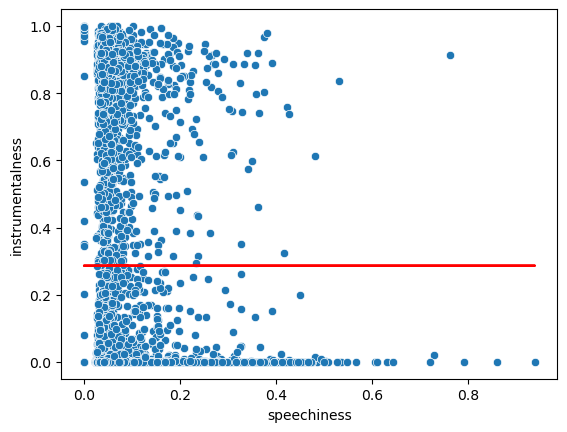

In [35]:
sns.scatterplot(data=df_test,  x="speechiness", y="instrumentalness")
plt.plot(x_test, reg.coef_[0]*x_test+reg.intercept_, c="red")

## Nonlinear regression

### Decision Tree Regressor

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
reg = DecisionTreeRegressor()

In [39]:
reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [40]:
y_pred = reg.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.041
MSE: 0.152
MAE: 0.327


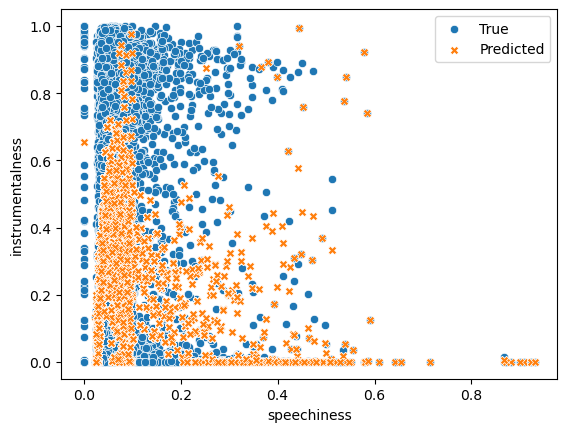

In [43]:
sns.scatterplot(data=df_train, x="speechiness", y="instrumentalness", label="True")
sns.scatterplot(data=df_train, x="speechiness", y=reg.predict(x_train), label="Predicted", marker="X")
plt.legend()
plt.show()

### KNN Regressor

In [44]:
from sklearn.neighbors import KNeighborsRegressor

In [45]:
reg = KNeighborsRegressor()

In [46]:
reg.fit(x_train, y_train)

KNeighborsRegressor()

y_pred = reg.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

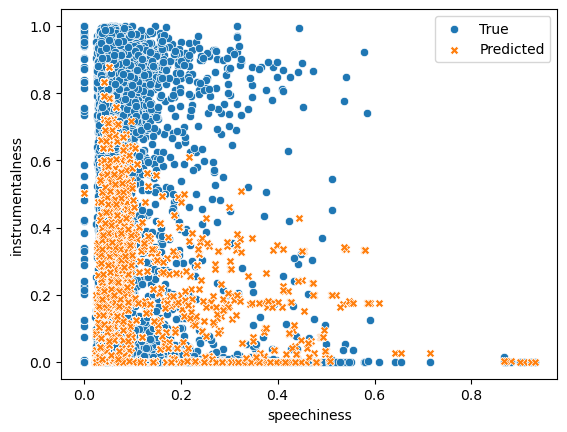

In [48]:
sns.scatterplot(data=df_train, x="speechiness", y="instrumentalness", label="True")
sns.scatterplot(data=df_train, x="speechiness", y=reg.predict(x_train), label="Predicted", marker="X")
plt.legend()
plt.show()

# Multiple Regression

In [50]:
X_train = df_train[["speechiness", "acousticness"]].values
y_train = df_train["instrumentalness"].values

X_test = df_test[["speechiness", "acousticness"]].values   
y_test = df_test["instrumentalness"].values


## Linear Regression

In [51]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.022
MSE: 0.143
MAE: 0.342


## Nonlinear Regression

In [53]:
reg = DecisionTreeRegressor()

In [54]:
reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [55]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.670
MSE: 0.244
MAE: 0.331


# Multivariate Regression (2+ target variables)

In [56]:
X_train = df_train[["speechiness", "acousticness"]].values
y_train = df_train[["instrumentalness", "valence"]].values

X_test = df_test[["speechiness", "acousticness"]].values
y_test = df_test[["instrumentalness", "valence"]].values 

In [57]:
reg = DecisionTreeRegressor()

In [58]:
reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [59]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.647
MSE: 0.183
MAE: 0.304
